# Kamień milowy 2(feature engineering and baseline)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [11]:
data = pd.read_csv("data.csv")
X = data.drop(["subject", "Activity", "ActivityName"], axis=1)
y = data["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
5538,0.267568,-0.015712,-0.065980,-0.995271,-0.977984,-0.963060,-0.996078,-0.980578,-0.961130,-0.942153,...,0.420093,-0.616825,-0.794250,-0.004331,0.212652,-0.370062,-0.352681,-0.837084,0.099222,-0.101149
2755,0.277109,-0.013876,-0.112776,-0.997565,-0.987851,-0.992859,-0.997805,-0.987097,-0.994136,-0.942406,...,0.545749,-0.785950,-0.956767,-0.041486,0.331615,0.036768,0.112289,-0.872126,0.009535,0.043758
5813,0.223730,-0.048263,-0.105781,-0.461582,-0.094674,-0.287821,-0.511609,-0.119351,-0.311649,-0.078237,...,0.221168,-0.175540,-0.545833,0.307722,0.490644,-0.842834,-0.607873,-0.854541,0.180849,-0.041994
7506,0.285830,-0.004668,-0.152746,-0.433399,0.009730,0.120867,-0.491119,0.047058,0.087327,-0.151067,...,-0.000990,-0.107975,-0.507438,-0.310129,0.097989,0.527328,-0.689166,-0.306913,0.303946,0.452417
1334,0.270514,-0.019739,-0.129706,-0.988424,-0.980260,-0.968742,-0.989403,-0.978525,-0.967611,-0.933788,...,0.342991,-0.547240,-0.800976,0.001274,-0.359362,0.041658,-0.338905,-0.791197,0.139212,0.162886


In [9]:
def drop_correlated(X, threshold=0.97):
    corr_df = X.corr().abs()
    columns_to_leave = np.ones((corr_df.shape[0], 1), dtype=bool)
    for i in range(corr_df.shape[0]):
        if columns_to_leave[i]:
            for j in range(i+1, corr_df.shape[0]):
                if corr_df.iloc[i, j] >= threshold:
                    columns_to_leave[j] = False
    columns_to_leave =  columns_to_leave.reshape(1, corr_df.shape[0])[0]
    return X.loc[:, columns_to_leave]

In [12]:
X_train = drop_correlated(X_train)
X_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,...,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean
5538,0.267568,-0.015712,-0.065980,-0.995271,-0.977984,-0.963060,-0.550491,-0.789656,0.843383,0.691476,...,-0.995824,-0.996387,-1.000000,0.420093,-0.616825,-0.794250,-0.004331,0.212652,-0.370062,-0.352681
2755,0.277109,-0.013876,-0.112776,-0.997565,-0.987851,-0.992859,-0.564823,-0.822405,0.846542,0.691177,...,-0.999933,-0.997907,-0.523810,0.545749,-0.785950,-0.956767,-0.041486,0.331615,0.036768,0.112289
5813,0.223730,-0.048263,-0.105781,-0.461582,-0.094674,-0.287821,-0.129826,-0.334681,0.386962,0.081401,...,-0.909415,-0.583603,-0.904762,0.221168,-0.175540,-0.545833,0.307722,0.490644,-0.842834,-0.607873
7506,0.285830,-0.004668,-0.152746,-0.433399,0.009730,0.120867,-0.146341,-0.294388,0.424646,0.031001,...,-0.495843,-0.588718,-0.904762,-0.000990,-0.107975,-0.507438,-0.310129,0.097989,0.527328,-0.689166
1334,0.270514,-0.019739,-0.129706,-0.988424,-0.980260,-0.968742,-0.567375,-0.810410,0.836722,0.682680,...,-0.996252,-0.993925,-1.000000,0.342991,-0.547240,-0.800976,0.001274,-0.359362,0.041658,-0.338905


## Feature engineering 

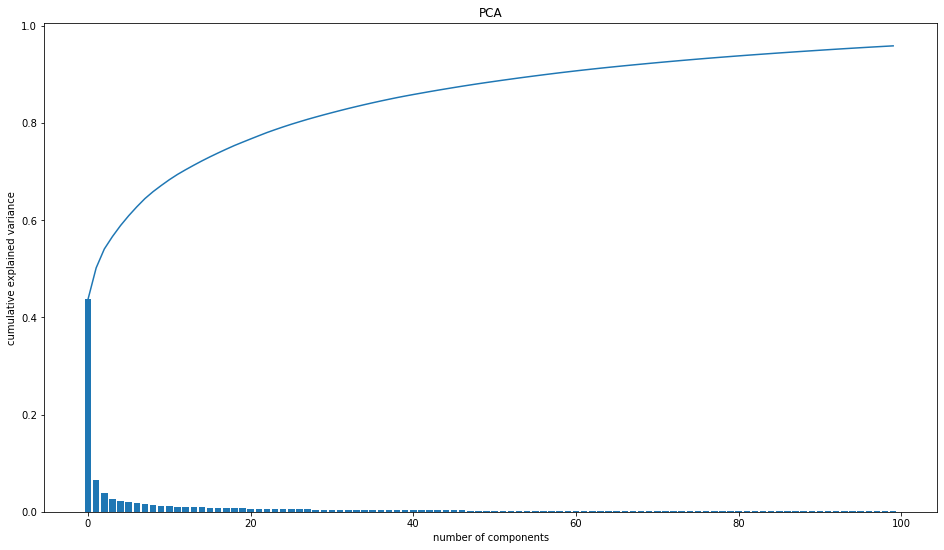

In [51]:
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
n = 100

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(np.cumsum(explained_variance[0:n]))
plt.bar(np.arange(n), explained_variance[0:n])
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.title("PCA")
plt.show()

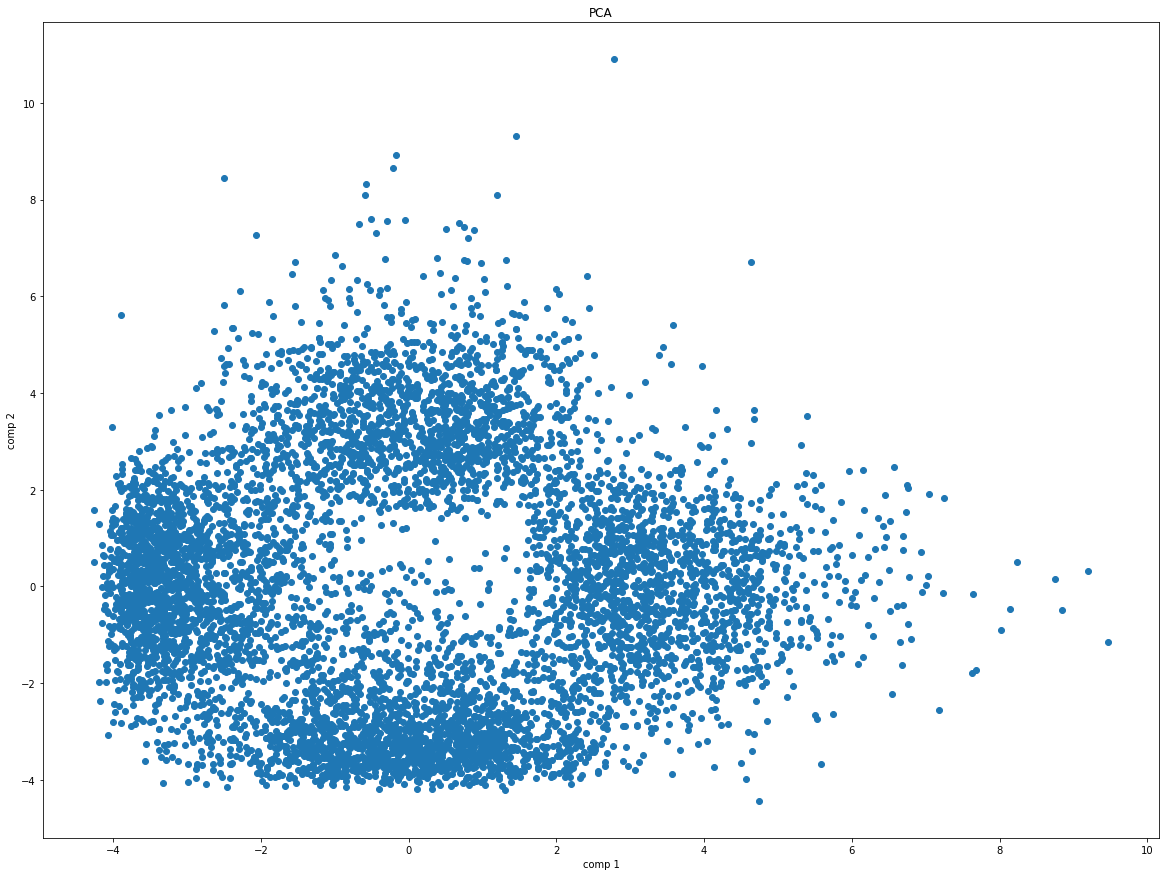

In [64]:
pca = PCA(n_components = 2)
pca.fit(X_train)
pca_comp = pca.transform(X_train)
pca_comp = pca_comp.reshape(2, pca_comp.shape[0])

plt.rcParams["figure.figsize"] = [20,15]
plt.scatter(pca_comp[0], pca_comp[1])
plt.xlabel("comp 1")
plt.ylabel("comp 2")
plt.title("PCA")
plt.show()
# widać 4 klastry(powinno być 6)

In [68]:
# pca_comp = pd.DataFrame.from_dict({'x': pca_comp[0], 'y': pca_comp[1]})

# sns.scatterplot(x="x", 
#                 y="y", 
#                 data=pca_comp, 
#                 hue=y_train, 
#                 legend="full",
#                palette="coolwarm")
# plt.xlabel("comp 1")
# plt.ylabel("comp 2")
# plt.title("PCA")
# plt.show()
# prawdziwe grupy są fatalnie wymieszane